# Generate Reporter Data

This notebook generates a set of reporter gene curves, from which students should identify "good" reporter candidates.

We simulate data using the the PDF of a beta distribution, obtained using `scipy`'s `beta.pdf()` function, e.g.

```python
a, b = 0.5, 0.5
data = beta.pdf(np.linspace(0.01, 0.99, 100), a, b)
```

Varying the $\alpha$ and $\beta$ (`a`, `b`) parameters controls the shape of the curve, and selection of an appropriate parameter set corresponds to "good/bad" reporters, e.g.

- $\alpha = 5$, $\beta = 1$: good reporter, "on" at high [Ab]
- $\alpha = 1$, $\beta = 3$: bad reporter, "on" at low [Ab]
- $\alpha = 2$, $\beta = 2$: bad reporter, "on" at moderate [Ab], off at low/high [Ab]
- $\alpha = 2$, $\beta = 5$: bad reporter, "on" at low [Ab]

In [140]:
# Python imports

import random

from pathlib import Path

import numpy as np
import seaborn as sns

from scipy.stats import beta

In [81]:
# Parameter sets - (alpha, beta) for different responses
params = {"high_on": (5, 1),
          "low_on": (1, 3),
          "mid_on": (2, 3),
          "low_mid_on": (2, 1)}

# SD sizes for generating random data
sd_alpha = 0.2  # for alpha parameter
sd_beta = 2  # for beta parameter
eps = 0.02  # for individual measurements

# Generate list of reporter candidates - two good, seven random poor
candidate_types = ["high_on", "high_on"] + [random.choice(["low_on", "mid_on", "low_mid_on"]) for _ in range(7)]
random.shuffle(candidate_types)
candidate_types

['high_on',
 'low_mid_on',
 'low_on',
 'high_on',
 'low_on',
 'mid_on',
 'low_on',
 'mid_on',
 'low_on']

In [97]:
def make_reporter_curve(aval, bval, sd_alpha=sd_alpha, sd_beta=sd_beta, eps=eps):
    """Return data for a simulated reporter curve"""
    a = np.random.normal(aval, sd_alpha)  # randomise alpha
    b = np.random.normal(bval, sd_beta)  # randomise beta
    
    data = [np.random.normal(_, eps) for _ in beta.pdf(np.linspace(0.01, 0.99, 10), a, b)]  # generate (randomised) data

    return data

<Axes: >

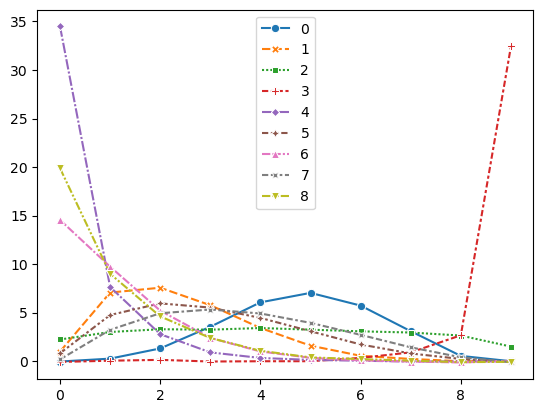

In [99]:
curves = np.array([make_reporter_curve(params[_][0], params[_][1]) for _ in candidate_types])
sns.lineplot(3*curves.T, markers=True)

In [100]:
frozen_curves = curves

<Axes: >

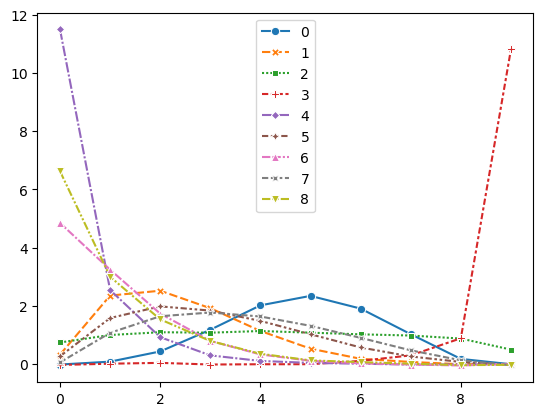

In [101]:
sns.lineplot(frozen_curves.T, markers=True)

In [105]:
control = abs(np.random.normal(0.1, 0.05, 10))
control

array([0.04631761, 0.07885653, 0.03778137, 0.00058342, 0.14890133,
       0.14130976, 0.10417967, 0.07841009, 0.0675577 , 0.07508432])

<Axes: >

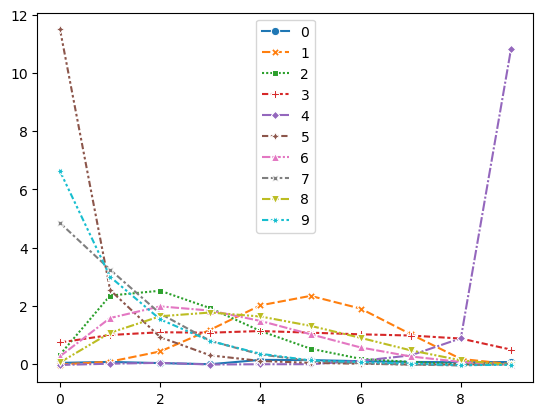

In [135]:
data = np.vstack([control, frozen_curves])
sns.lineplot(data.T, markers=True)

In [136]:
ids = ["control"] + [f"pABS1.{_+1:02d}" for _ in range(9)]
names = []
for nameid in ids:
    names = names + [nameid] * 10

In [139]:
for sample, conc, val in zip(names, list(range(0, 10)) * 10, abs(data.ravel())):
    print(sample, conc, val)

control 0 0.04631761416599858
control 1 0.0788565302893555
control 2 0.03778137244449939
control 3 0.0005834223608695288
control 4 0.14890133123882882
control 5 0.14130975537983217
control 6 0.10417966504578927
control 7 0.07841009025223683
control 8 0.06755770185288987
control 9 0.07508432126470715
pABS1.01 0 0.011170018466840386
pABS1.01 1 0.08875077012702982
pABS1.01 2 0.4385045958604598
pABS1.01 3 1.1832608468841839
pABS1.01 4 2.021303836600745
pABS1.01 5 2.3463253016396477
pABS1.01 6 1.9098066909618963
pABS1.01 7 1.0310152961451702
pABS1.01 8 0.18242496194278895
pABS1.01 9 0.0004295383975609459
pABS1.02 0 0.330356163606838
pABS1.02 1 2.357204419015519
pABS1.02 2 2.523632313997949
pABS1.02 3 1.9226692825457992
pABS1.02 4 1.141400279105067
pABS1.02 5 0.5339707760769644
pABS1.02 6 0.18559146939648213
pABS1.02 7 0.0781222162022216
pABS1.02 8 0.0009312241195736258
pABS1.02 9 0.00758993832918825
pABS1.03 0 0.7463101508111497
pABS1.03 1 1.002887536866851
pABS1.03 2 1.0982949063590954
pAB

In [143]:
with Path("../assets/data/reporter_curves.csv").open("w") as ofh:
    ofh.write("sample,conc,abs_ratio\n")
    for sample, conc, ratio in zip(names, list(range(0, 10)) * 10, abs(data.ravel())):
        ofh.write(f"{sample},{conc:.01f},{ratio:.03f}\n")